# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country= city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("skipping")
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | odda
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | severo-yeniseyskiy
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | aykhal
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | nicoya
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | acarau
Processing Record 23 of Set 1 | kencong
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,291.37,79,100,3.14,JP,1717869713
1,bethel,41.3712,-73.4140,297.71,56,30,0.89,US,1717869738
2,bredasdorp,-34.5322,20.0403,283.58,85,87,1.20,ZA,1717869738
3,port-aux-francais,-49.3500,70.2167,279.32,96,100,15.15,TF,1717869738
4,odda,60.0691,6.5457,283.02,95,94,3.49,NO,1717869738


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,291.37,79,100,3.14,JP,1717869713
1,bethel,41.3712,-73.4140,297.71,56,30,0.89,US,1717869738
2,bredasdorp,-34.5322,20.0403,283.58,85,87,1.20,ZA,1717869738
3,port-aux-francais,-49.3500,70.2167,279.32,96,100,15.15,TF,1717869738
4,odda,60.0691,6.5457,283.02,95,94,3.49,NO,1717869738


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

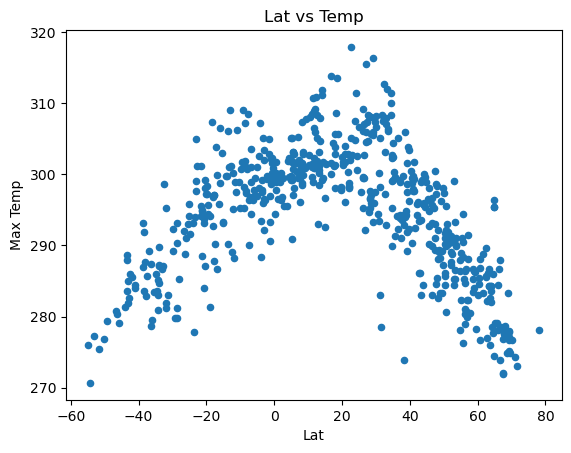

In [8]:
# Build scatter plot for latitude vs. temperature
temp_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',title='Lat vs Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

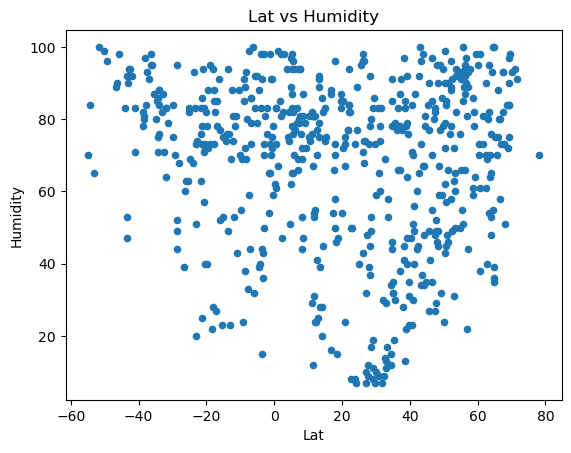

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Humidity',title='Lat vs Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

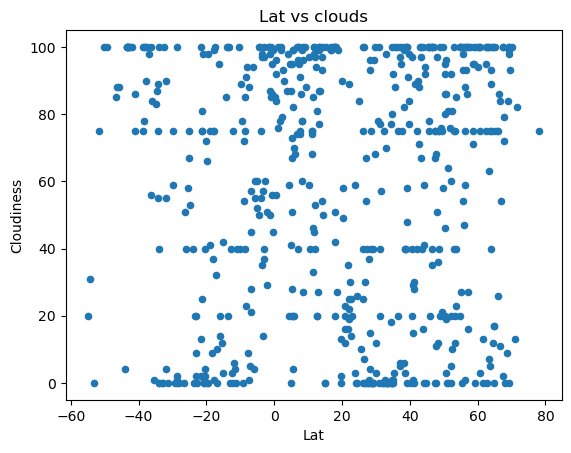

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloud_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title='Lat vs clouds')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

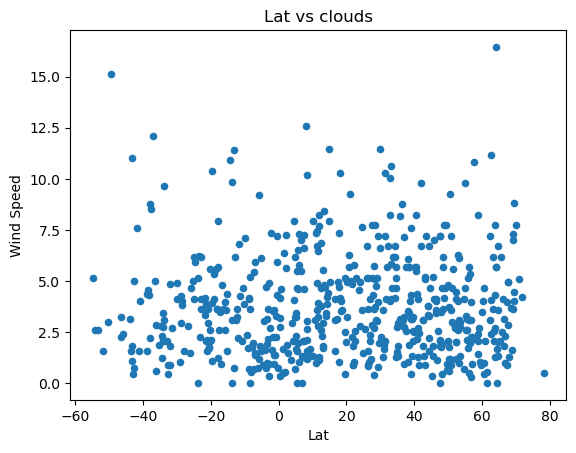

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title='Lat vs clouds')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linfunc(df,x_column,y_column):
    result = linregress(df[x_column], df[y_column])
    
    # Return regression parameters
    print(f"slope={result.slope},intercept= {result.intercept},ravlue= {result.rvalue}, pvalue={result.pvalue},stderr= {result.stderr}")



In [13]:
linfunc(city_data_df,'Lat','Lng')


slope=-0.17718813949031353,intercept= 20.436183351701303,ravlue= -0.0633837833299187, pvalue=0.12634400499161877,stderr= 0.11574287782268829


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,291.37,79,100,3.14,JP,1717869713
1,bethel,41.3712,-73.4140,297.71,56,30,0.89,US,1717869738
4,odda,60.0691,6.5457,283.02,95,94,3.49,NO,1717869738
5,dudinka,69.4058,86.1778,275.19,97,99,4.02,RU,1717869738
6,utrik,11.2278,169.8474,301.11,81,75,7.45,MH,1717869738


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,283.58,85,87,1.20,ZA,1717869738
3,port-aux-francais,-49.3500,70.2167,279.32,96,100,15.15,TF,1717869738
8,adamstown,-25.0660,-130.1015,295.87,82,67,4.10,PN,1717869738
9,mount isa,-20.7333,139.5000,284.02,71,0,3.60,AU,1717869738
12,waitangi,-43.9535,-176.5597,281.38,83,4,3.13,NZ,1717869738


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
north_regress=linfunc(northern_hemi_df,'Max Temp','Lat')

slope=-1.591052263987161,intercept= 505.2789197590388,ravlue= -0.7486624329170669, pvalue=3.9991155287135745e-74,stderr= 0.07009538339955039


In [17]:
# Linear regression on Southern Hemisphere
south_regress=linfunc(southern_hemi_df,'Max Temp','Lat')

slope=1.3576751333778074,intercept= -418.6354191819713,ravlue= 0.7738696454446939, pvalue=1.5015988711242667e-36,stderr= 0.08399420235489849


The main takeaway from the regression analysis is that there is a statistically stong relationship between latitude and temp in both hemispheres/.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temperature (°C)')

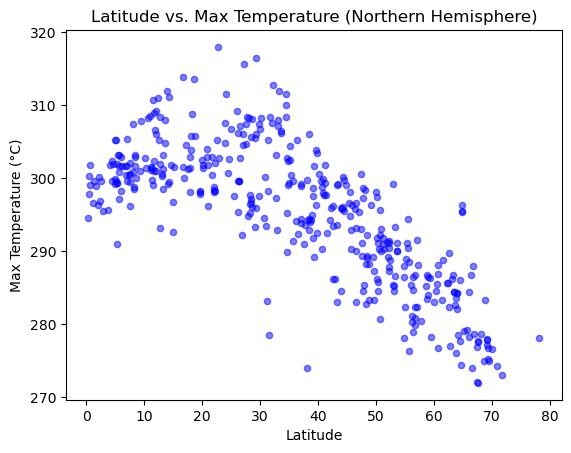

In [18]:
# Northern Hemisphere


# Scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', color='blue', alpha=0.5)
plt.title('Latitude vs. Max Temperature (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
# Plot the regression line


# Add labels and title


# Show plot


Text(0, 0.5, 'Max Temperature (°C)')

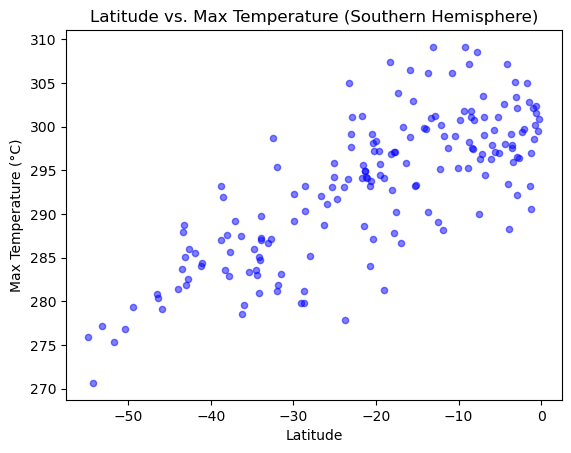

In [19]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', color='blue', alpha=0.5)
plt.title('Latitude vs. Max Temperature (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
# YOUR CODE HERE

this clearly illustrates temperature falling as you move further away from 0 in latitude. This applie to both hemispheres.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness')

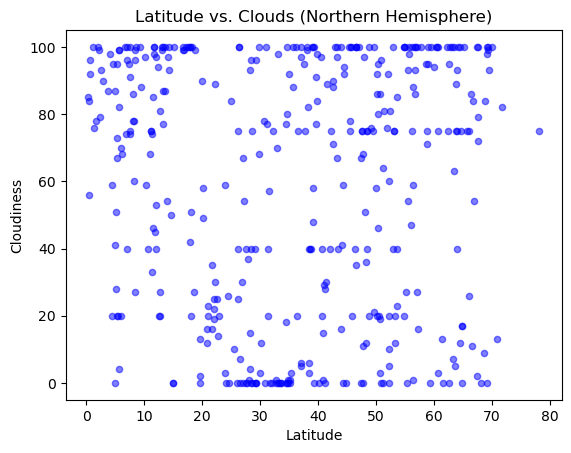

In [20]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', color='blue', alpha=0.5)
plt.title('Latitude vs. Clouds (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Cloudiness')

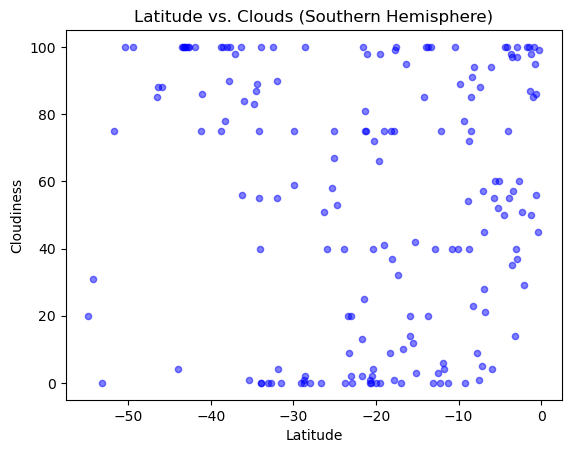

In [21]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', color='blue', alpha=0.5)
plt.title('Latitude vs. Clouds (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

This appears to show no correlation between clouds and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed')

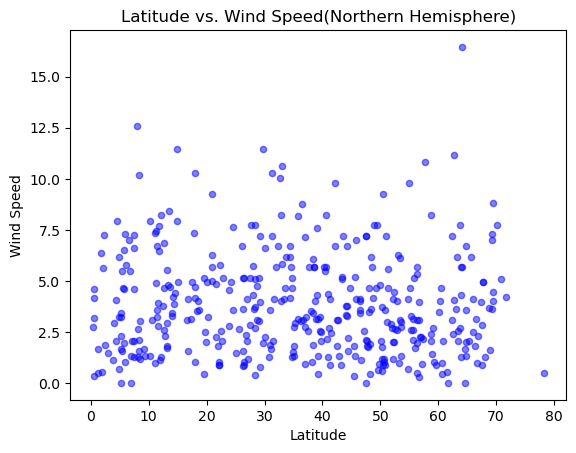

In [22]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', color='blue', alpha=0.5)
plt.title('Latitude vs. Wind Speed(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

Text(0, 0.5, 'Wind Speed')

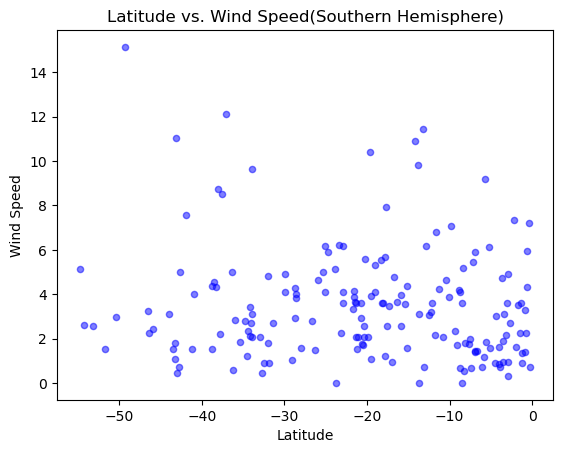

In [23]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', color='blue', alpha=0.5)
plt.title('Latitude vs. Wind Speed(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

This shows no correlation between lat and wind speed